# Overview of respiration data preprocessing and analysis
This tutorial covers a basic pipeline for preprocessing and analysis of respiration data collected during a experimental task. It introduces core `pyriodic` classes.


At first, we import the necessary Python modules:

In [1]:
import pickle

from pyriodic.preproc import RawSignal
from pyriodic.viz import plot_phase_diagnostics


## Load in data and create `RawSignal` object

The first step is to load in the respiration time series data. Together with the sampling frequency, this is used to create a `RawSignal` object. This object holds many useful methods for preprocessing the raw data. 


In [2]:
# load data
with open("../../data/respiration/example.pkl", "rb") as file:
    data = pickle.load(file)

# extract respiration timeseries and sampling frequency
resp_ts = data["respiration_timeseries"].get_data().squeeze()
sfreq = data["respiration_timeseries"].info["sfreq"]


# initialise RawSignal object
raw = RawSignal(resp_ts, fs = sfreq)

The `RawSignal` object has a built-in plotting method that allows you to visualise the data. You can specify the start time and duration of the segment you want to plot. If no arguments are provided, it will plot the first 20 seconds of the signal. 

<Axes: xlabel='Time (s)', ylabel='Amplitude'>

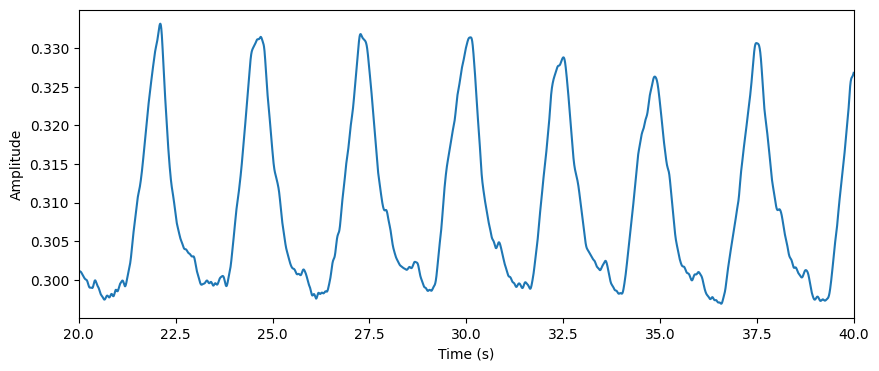

In [3]:
raw.plot(start = 20, duration = 20)

## Preprocessing


<Axes: xlabel='Time (s)', ylabel='Amplitude'>

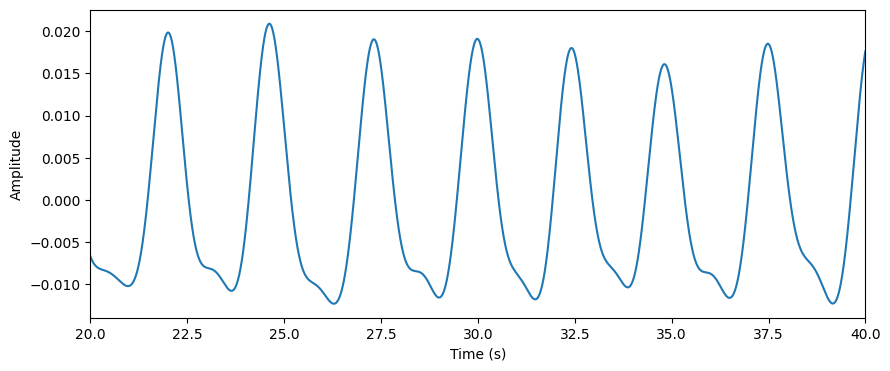

In [4]:
raw.filter_bandpass(low = 0.1, high = 1)
raw.plot(start = 20, duration = 20)

<Axes: xlabel='Time (s)', ylabel='Amplitude'>

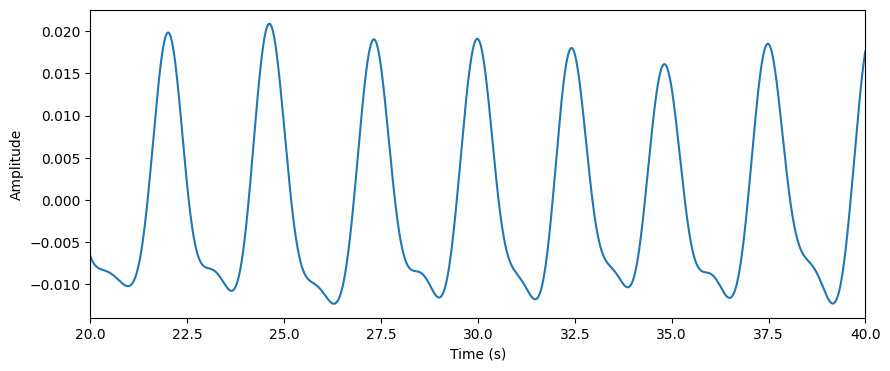

In [5]:
raw.smoothing(window_size=50)
raw.plot(start = 20, duration = 20)

<Axes: xlabel='Time (s)', ylabel='Amplitude'>

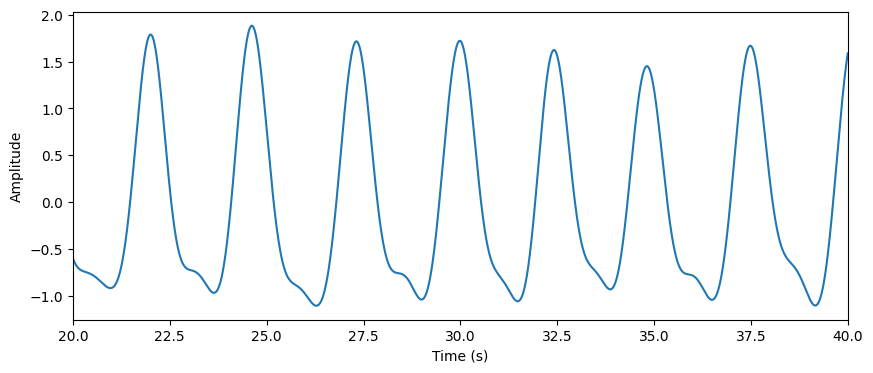

In [6]:
raw.zscore()
raw.plot(start = 20, duration = 20)

As the data is modified in-place, the original signal is lost. If you want to keep the original signal, make a copy before applying any modifications. To see which modifications have been applied to the signal, you can print the history:

In [7]:
raw.history

['bandpass(0.1 Hz - 1 Hz)',
 'Smoothing has been applied with a window size of 50',
 'zscore()']

### Extract phase angles

start_idx 1200000


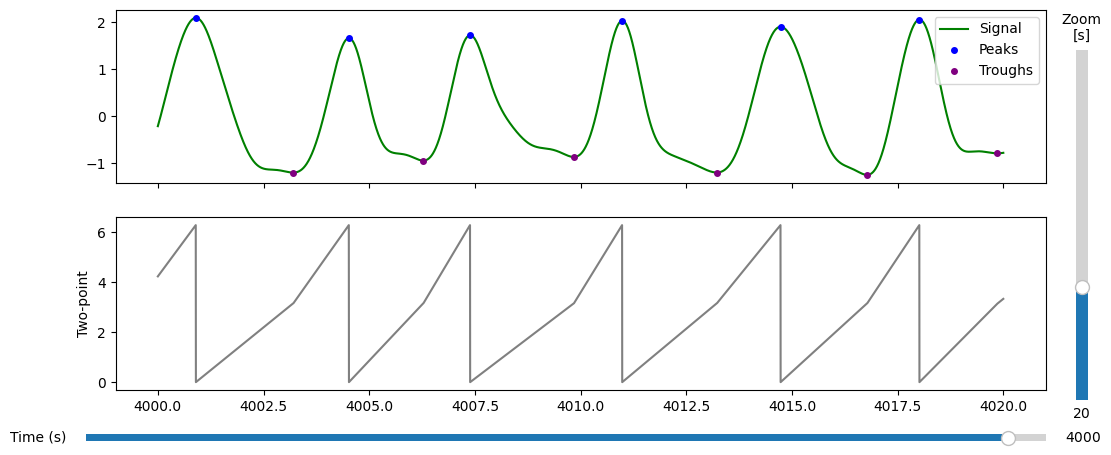

(<Figure size 1200x500 with 4 Axes>,
 array([<Axes: >, <Axes: ylabel='Two-point'>], dtype=object))

In [16]:
phase, peaks, troughs = raw.phase_linear(prominence=0.1, distance=0.5)

plot_phase_diagnostics(
            {"Two-point": phase},
            start = 4000,
            window_duration = 20,
            fs = raw.fs,
            data = raw.ts, #the preproccessed data 
            peaks=peaks,
            troughs=troughs
        )